## Importing the Dependencies

In [2]:
!pip install tensorflow-hub

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


In [3]:
hub.__version__

'0.12.0'

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Loading the Model

In [7]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

## Taking Feed and Making Detections

In [12]:
cap = cv2.VideoCapture('footbal_practice.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 384,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.2)
    
    
    frame = cv2.resize(frame, (1280,720))
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
keypoints_with_scores

array([[[0.24014913, 0.8772122 , 0.4914245 ],
        [0.22969401, 0.8810677 , 0.5724816 ],
        [0.23038636, 0.87499344, 0.52883786],
        [0.23392716, 0.89138263, 0.5937266 ],
        [0.23459522, 0.8822629 , 0.4012545 ],
        [0.26454836, 0.8952198 , 0.6683838 ],
        [0.26347566, 0.91663164, 0.6132232 ],
        [0.3110158 , 0.8727813 , 0.5477124 ],
        [0.290433  , 0.9539072 , 0.67502964],
        [0.3357576 , 0.848559  , 0.29494902],
        [0.33182237, 0.97289914, 0.32860598],
        [0.3621515 , 0.9222464 , 0.794361  ],
        [0.36450848, 0.9423359 , 0.79510736],
        [0.42132628, 0.89409   , 0.33616766],
        [0.46090233, 0.95354235, 0.5552985 ],
        [0.47871536, 0.8873685 , 0.2172242 ],
        [0.5303852 , 0.9925429 , 0.37633654]],

       [[0.05595874, 0.20674546, 0.04350789],
        [0.05619124, 0.19513556, 0.04016252],
        [0.0645083 , 0.2250762 , 0.03967931],
        [0.06362048, 0.19020349, 0.02619892],
        [0.04201151, 0.24497493,

## Drawing Keypoints

In [8]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

## Drawing Connections

In [9]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [10]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

## Looping Through Everyone in the Frame

In [11]:
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

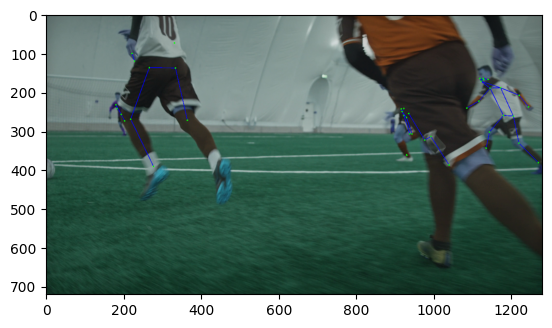

In [14]:
plt.imshow(frame);